<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS_121_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [16]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-18 04:01:33--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.176.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.176.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  47.7MB/s    in 4.5s    

2019-09-18 04:01:38 (43.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


## Download with Python

In [10]:
import urllib.request
# Download the file from 'url; and save it
url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'
file_name = 'instacart_online_grocery_shopping_2017_05_01.tar.gz'
urllib.request.urlretrieve(url, file_name)

('instacart_online_grocery_shopping_2017_05_01.tar.gz',
 <http.client.HTTPMessage at 0x7f5e9707bb70>)

In [0]:

# import tarfile
# tar = tarfile.open(file_name, "r:gz")
# tar.extractall()
# tar.close()

In [11]:
# how to figoure out what files look like
# import os
# our working directory:  print(os.getcwd())
print(os.getcwd())
# os.chdir('/content/instacart_2017_05_01/')
# print(os.getcwd()))
# import glob
# glob.glob("/content/instacart_2017_05_01/")

NameError: ignored

# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [12]:
# Let's view that image
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [13]:
!ls -lh *.csv

ls: cannot access '*.csv': No such file or directory


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [0]:
import pandas as pd

### aisles

In [15]:
aisles = pd.read_csv("aisles.csv")
aisles.head()

FileNotFoundError: ignored

In [12]:
aisles.shape

(134, 2)

In [13]:
display(example)

### departments

In [15]:
aisles.describe()  # only 1 numerical column so this is not useful on this ; aisle ID is nominal categorical 

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [16]:
aisles.describe(exclude='number')

,aisle
count,134
unique,134
top,meat counter
freq,1


In [18]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
departments.shape

(21, 2)

In [21]:
display(example)

### order_products__prior

In [22]:
!ls  # print all the files we have in the directory

aisles.csv					     order_products__train.csv
departments.csv					     orders.csv
instacart_online_grocery_shopping_2017_05_01.tar.gz  products.csv
order_products__prior.csv


In [23]:
!ls -1 # same but all in one column

aisles.csv
departments.csv
instacart_online_grocery_shopping_2017_05_01.tar.gz
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv


In [49]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [30]:
order_products__prior.shape

(32434489, 4)

We need:

1.   order_id
2.   product_id
3.   add_to_cart_order



### order_products__train

In [41]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [36]:
order_products__train.shape

(1384617, 4)

### orders

In [33]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [34]:
orders.shape

(3421083, 7)

In [37]:
display(example)

### We need:
- order_id
- user_id
- order_number
- order_dow
- order_hour_of_day

### products

In [38]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [39]:
products.shape

(49688, 4)

## Concatenate order_products__prior and order_products__train

In [50]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape

(33819106, 4)

In [51]:
print(order_products__prior.shape, order_products__train.shape, order_products.shape)

(32434489, 4) (1384617, 4) (33819106, 4)


In [0]:
assert len(order_products__prior) + len(order_products__train) == len(order_products)  # to see if any mistakes, no error so good

### Short 'groupby' example

In [53]:
order_products.groupby('order_id')['product_id'].count()

order_id
1           8
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
           ..
3421053     9
3421055    19
3421056     5
3421057     5
3421058     8
3421059     6
3421060    17
3421061    22
3421062     7
3421063     4
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421070     3
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3346083, dtype: int64

In [54]:
order_products.groupby('order_id')['product_id'].count().mean()

10.10707325550502

In [56]:
# assign groups to a variable
grouped_orders = order_products.groupby('order_id')
grouped_orders

In [58]:
grouped_orders.get_group(2) # part of dataframe that responds to order_id 2

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [59]:
grouped_orders.get_group(2539329)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [61]:
# Filter - another way to do the above
order_products[order_products['order_id'] == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [63]:
# number of different products
grouped_orders['product_id'].count()

order_id
1           8
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
           ..
3421053     9
3421055    19
3421056     5
3421057     5
3421058     8
3421059     6
3421060    17
3421061    22
3421062     7
3421063     4
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421070     3
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3346083, dtype: int64

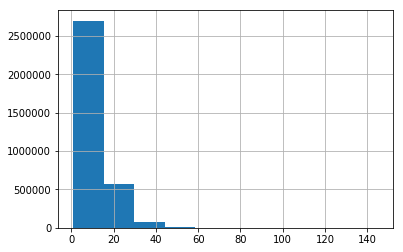

In [64]:
# what number of bins to use in our histograme. Lets look at it
grouped_orders['product_id'].count().hist()

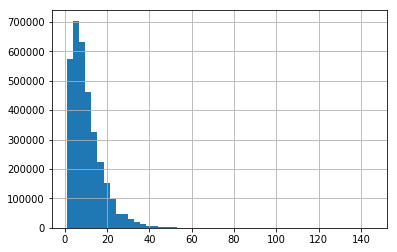

In [67]:
# Lets try 50 bins
grouped_orders['product_id'].count().hist(bins=50)

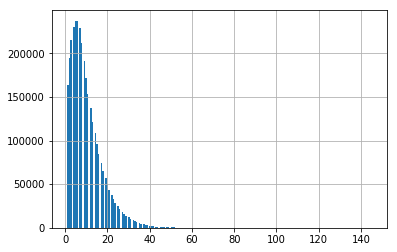

In [68]:
# Lets try 200 bins -its too granular- so experiment with these numbers to get the right one
grouped_orders['product_id'].count().hist(bins=200)

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [69]:
display(example)

In [70]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [71]:
orders.shape

(3421083, 7)

In [72]:
# Filter and subset before we try to merge
condition = orders['user_id'] == 1
orders[condition]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [74]:
# Dont need all the columns
condition = orders['user_id'] == 1
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders[condition][columns]


,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7
2,473747,1,3,3,12
3,2254736,1,4,4,7
4,431534,1,5,4,15
5,3367565,1,6,2,7
6,550135,1,7,1,9
7,3108588,1,8,1,14
8,2295261,1,9,1,16
9,2550362,1,10,4,8


In [77]:
condition = (orders['user_id'] == 1)  & (orders['order_number'] <=2)  
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders[condition][columns]

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


In [78]:
# Another way
condition1 = (orders['user_id'] == 1)
condition1= (orders['order_number'] <=2)  
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders[condition][columns]

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


In [85]:
# More extensive
condition = (orders['user_id'] == 1)  & ((orders['order_number'] ==1)  | (orders['order_number'] ==2))
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders[condition][columns]

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


In [94]:
condition = (orders['user_id'] == 1)  & (orders['order_number'] <=2)  
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
subset = orders[condition][columns]
subset

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


In [93]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [87]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [89]:
columns = ['order_id', 'product_id', 'add_to_cart_order']
order_products[columns]

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
5,2,17794,6
6,2,40141,7
7,2,1819,8
8,2,43668,9
9,3,33754,1


In [95]:
columns = ['order_id', 'product_id', 'add_to_cart_order']
merged = pd.merge(subset, order_products[columns], how='inner', on='order_id')
merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [96]:
# Lets compare how far off from example, looks like we are still missing product name
display(example)

Merge with columns from `products`

In [108]:
final = pd.merge(merged, products[['product_id', 'product_name']])
final.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,2539329,1,1,2,8,196,1,Soda
1,2398795,1,2,3,7,196,1,Soda
2,2539329,1,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,1,2,8,12427,3,Original Beef Jerky
4,2398795,1,2,3,7,12427,3,Original Beef Jerky


In [0]:
# Ok we have what is in example except for order, lets reorder the columns

In [109]:
columns = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']
final[columns]

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [110]:
# to sort like example
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final.head(15)


,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,2539329,1,1,2,8,196,1,Soda
2,2539329,1,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,1,2,8,12427,3,Original Beef Jerky
5,2539329,1,1,2,8,26088,4,Aged White Cheddar Popcorn
7,2539329,1,1,2,8,26405,5,XL Pick-A-Size Paper Towel Rolls
1,2398795,1,2,3,7,196,1,Soda
8,2398795,1,2,3,7,10258,2,Pistachios
4,2398795,1,2,3,7,12427,3,Original Beef Jerky
9,2398795,1,2,3,7,13176,4,Bag of Organic Bananas
6,2398795,1,2,3,7,26088,5,Aged White Cheddar Popcorn


In [101]:
display(example)

In [104]:
columns = [col.replace('_', '') for col in final.columns]  # For every column in final, replace _ with a space
columns


['orderid',
 'userid',
 'ordernumber',
 'orderdow',
 'orderhourofday',
 'productid',
 'addtocartorder',
 'productname']

In [106]:
final.columns = columns
final.head()

,orderid,userid,ordernumber,orderdow,orderhourofday,productid,addtocartorder,productname
0,2539329,1,1,2,8,196,1,Soda
2,2539329,1,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,1,2,8,12427,3,Original Beef Jerky
5,2539329,1,1,2,8,26088,4,Aged White Cheddar Popcorn
7,2539329,1,1,2,8,26405,5,XL Pick-A-Size Paper Towel Rolls


# Reshape Datasets

### Table 1--> Tidy

In [113]:
table1

NameError: ignored

In [0]:
table1.index

In [0]:
table1 = table1.reset_index()
table1

In [0]:
tidy = table1.melt(id_vars='index')
tidy

In [0]:
tidy.columns = ['name', 'trt', 'result']
tidy

### Table 2 --> Tidy

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [116]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [119]:
table1.index

Index(['John Smith', 'Jane Doe', 'Mary Johnson'], dtype='object')

In [120]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [121]:
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [122]:
tidy.columns = ['name', 'trt', 'result']
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [117]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [123]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [0]:
import seaborn as sns

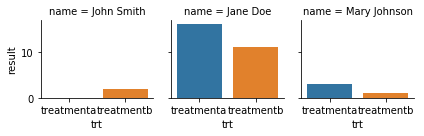

In [125]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [128]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
import pandas as pd
product_names = ['Half And Half Ultra Pasteurized', 'Half Baked Frozen Yogurt']

In [9]:
products.columns

NameError: ignored

In [7]:
orders.columns

NameError: ignored

In [131]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [0]:
# using different way to merge other than pd.merge(df1,df2, how='inner,  on='') we used earlier

# Other way is df1.merge(df2) approach which is below
merged = products[['product_id', 'product_name',]].merge(order_products[['order_id', 'product_id']])

In [0]:
merged = (products[['product_id', 'product_name',]]
.merge(order_products[['order_id', 'product_id']])
.merge(orders[['order_id', 'order_hour_of_day']]))

In [0]:
merged.head()

In [0]:
condition = merged['product_name'].isin(product_names)
subset = merged[condition]
subset.head()

In [0]:
subset['product_name'].unique()

In [0]:
# convert to a list
list(subsert['product_name'].unique())

In [0]:
# what if we sort
assert sorted(list(subsert['product_name'].unique())) == sorted(product_names)

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
# subset of a subset
froyo = subset[subset['product_name']] == 'Half Baked Frozen Yogurt']
cream = subset[subset['product_name']] == 'Half And Half Ultra Pasteurized']


In [0]:
cream.head()

In [0]:
cream['oder_hour_of_day'].value_counts(normalize=True).sort_index().plot()


In [0]:
froyo'Half Baked Frozen Yogurt']value_counts(normalize=True).sort_index().plot

### 2. crosstab

In [0]:
pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize='columns').plot()

### 3. Pivot Table

In [0]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunct=len).plot()

### 4. melt

In [0]:
table = pd.crosstabl(subset['order_hour_of_day'],
                    ['product_name'])